In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
dataset = pd.read_csv('datos_entrenamiento.csv')  # Asegúrate de reemplazar 'tu_dataset.csv' con el nombre de tu archivo

# Dividir los datos en características (X) y etiquetas (y)
X = dataset[['PosX', 'PosY']]
y = dataset[['Muslo', 'Rodilla']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

Error Cuadrático Medio (MSE): 0.08862866172993711
Coeficiente de Determinación (R^2): 0.8138865157568491


Epoch 1/50
180/180 - 1s - loss: 0.6344 - val_loss: 0.0817 - 963ms/epoch - 5ms/step
Epoch 2/50
180/180 - 0s - loss: 0.0229 - val_loss: 0.0086 - 195ms/epoch - 1ms/step
Epoch 3/50
180/180 - 0s - loss: 0.0067 - val_loss: 0.0058 - 191ms/epoch - 1ms/step
Epoch 4/50
180/180 - 0s - loss: 0.0047 - val_loss: 0.0044 - 189ms/epoch - 1ms/step
Epoch 5/50
180/180 - 0s - loss: 0.0035 - val_loss: 0.0035 - 199ms/epoch - 1ms/step
Epoch 6/50
180/180 - 0s - loss: 0.0027 - val_loss: 0.0024 - 189ms/epoch - 1ms/step
Epoch 7/50
180/180 - 0s - loss: 0.0021 - val_loss: 0.0019 - 190ms/epoch - 1ms/step
Epoch 8/50
180/180 - 0s - loss: 0.0018 - val_loss: 0.0016 - 190ms/epoch - 1ms/step
Epoch 9/50
180/180 - 0s - loss: 0.0015 - val_loss: 0.0017 - 188ms/epoch - 1ms/step
Epoch 10/50
180/180 - 0s - loss: 0.0013 - val_loss: 0.0012 - 187ms/epoch - 1ms/step
Epoch 11/50
180/180 - 0s - loss: 0.0011 - val_loss: 9.9567e-04 - 188ms/epoch - 1ms/step
Epoch 12/50
180/180 - 0s - loss: 9.5728e-04 - val_loss: 9.8467e-04 - 190ms/epoch 

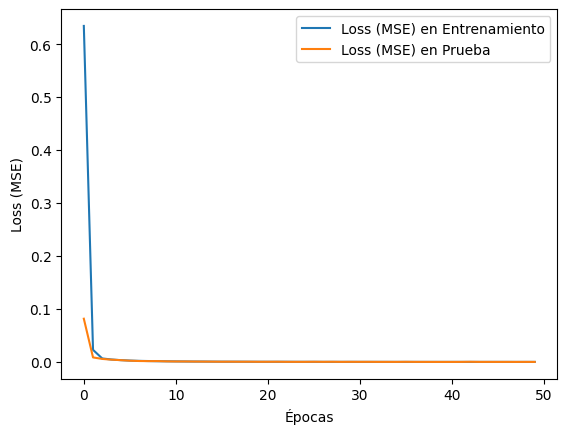

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar el dataset
dataset = pd.read_csv('datos_entrenamiento.csv')  # Asegúrate de reemplazar 'tu_dataset.csv' con el nombre de tu archivo

# Dividir los datos en características (X) y etiquetas (y)
X = dataset[['PosX', 'PosY']].values
y = dataset[['Muslo', 'Rodilla']].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos (escalar)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de Red Neuronal Artificial (RNA)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)  # Dos salidas para Muslo y Rodilla
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Loss (MSE) en Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss (MSE) en Prueba')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [83]:
import numpy as np

def BuscarInterserccion(center, radius, line_slope, line_intercept):
    a = 1 + line_slope**2
    b = -2 * center[0] + 2 * line_slope * (line_intercept - center[1])
    c = center[0]**2 + (line_intercept - center[1])**2 - radius**2

    discriminant = b**2 - 4*a*c

    if discriminant < 0:
        return []  # No intersection points

    x1 = (-b + np.sqrt(discriminant)) / (2*a)
    x2 = (-b - np.sqrt(discriminant)) / (2*a)
    y1 = line_slope * x1 + line_intercept
    y2 = line_slope * x2 + line_intercept

    return [(x1, y1), (x2, y2)]

def CrearOvaloTrayectoriaCompleta(point1, point2, altura, frames):
    x1, y1 = point1
    x2, y2 = point2
    
    # Calcular el ancho y la altura utilizando los puntos dados
    if x1 > x2:
        width = x1*2
    elif x1 < x2:
        width = x2*2
    height = altura/2
    
    # Calcular el centro del óvalo
    center_x = (x1 + x2) / 2
    center_y = (y1 + y2) / 2
    
    # Generar el óvalo utilizando las dimensiones calculadas
    theta = np.linspace(0, 2 * np.pi, frames)
    x = center_x + width/2 * np.cos(theta)
    y = center_y + height/2 * np.sin(theta)
    
    return x, y

def Get_Mov(largo_extremidad, altura_actual, Frames):
    # Parámetros de la circunferencia y la recta
    center = (0, 0)
    radius = largo_extremidad * 2
    line_slope = 0
    #altura_actual = 0.3

    # Encontrar puntos de intersección
    intersection_points = BuscarInterserccion(center, radius, line_slope, altura_actual)

    # Puntos que definen el óvalo
    point1 = intersection_points[0]
    point2 = intersection_points[1]

    # Crear el óvalo que pasa por los puntos dados
    #                                               , altura)
    x, y = CrearOvaloTrayectoriaCompleta(point1, point2, altura_actual, Frames)

    mov_x = []
    mov_y = []
    for i in range(len(y)):
        if y[i] <= altura_actual: # Si es menor que la distancia del robot al piso se puede elevar la pata
            mov_x.append(x[i])
            mov_y.append(y[i])

    #--------------------------------------------------------
    #
    #       aGREGAR EL ARRASTE, LA LINEA RECTA
    #
    #--------------------------------------------------------

    
    mitad = len(mov_y) // 2
    
    aux1 = [altura_actual for i in range(len(mov_y))]
    
    aux1 = aux1[mitad:]
    aux1_1 = aux1[:mitad]
    
    # Elimina el primer elemento del arreglo para evitar un mal comportamiento
    mov_y = mov_y[1:]
    mov_y = aux1 + mov_y + aux1_1
    aux1 = np.linspace(mov_x[len(mov_x)-1], mov_x[1], len(mov_x))
    
    # Asocia la mitad del arraste, para antes y despues de la trayectoria
    aux2 = aux1[:mitad]
    aux3 = aux1[mitad:]
    
    # Elimina el primer elemento del arreglo para evitar un mal comportamiento
    mov_x = mov_x[1:]
    mov_x = np.concatenate((aux3,mov_x))
    mov_x = np.concatenate((mov_x,aux2))
    #print("largo de MOV_X = ", len(mov_x))
    #print("largo de MOV_Y = ", len(mov_y))
    return mov_x, mov_y

In [49]:

def LimpiezaIndividial(mov_x,mov_y):
    df = pd.DataFrame({'mov_x': mov_x, 'mov_y': mov_y})
    differences = df.diff()
    fila_mayor_diferencia = differences.abs().sum(axis=1).idxmax()

    # Imprimir la fila antes de la multiplicación
    #print(df.iloc[fila_mayor_diferencia-1])
    print(fila_mayor_diferencia)

    # Multiplicar el valor de 'mov_y' por -1
    df.at[fila_mayor_diferencia, 'mov_y'] *= -1
    mov_y = df['mov_y'].values
    mov_x = df['mov_x'].values
    coordenadas = list(zip(mov_y, mov_x))
    return coordenadas

largo de MOV_X =  401
largo de MOV_Y =  401
13/13 [==============================] - 0s 1ms/step


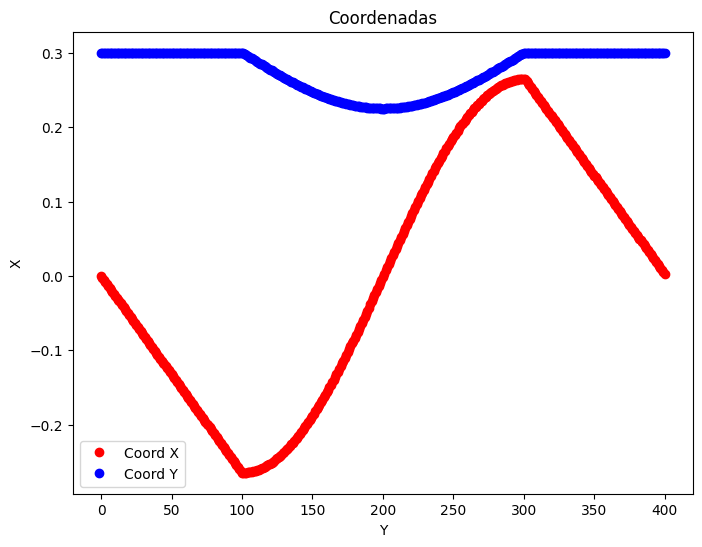

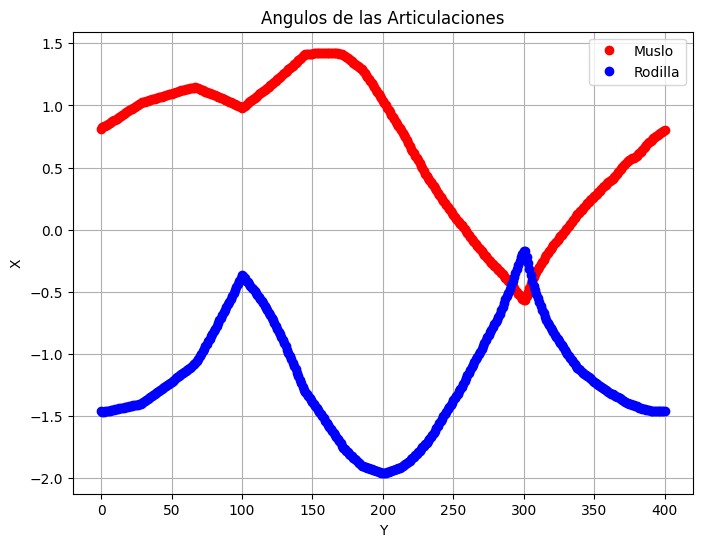

In [92]:
mov_x , mov_y = Get_Mov(0.2,0.3,400)
#coordenadas = LimpiezaIndividial(mov_x , mov_y)
# Normalizar las coordenadas utilizando el mismo scaler que se usó durante el entrenamiento
coordenadas = list(zip(mov_y, mov_x))
coordenadas_normalizadas = scaler.transform(coordenadas)
prediccion = model.predict(coordenadas_normalizadas)

plt.show()
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(mov_x, 'ro', label='Coord X')  # Grupo 1 en rojo ('ro')
plt.plot(mov_y, 'bo', label='Coord Y')  # Grupo 1 en rojo ('ro')
plt.xlabel('Y')  # Etiqueta eje X
plt.ylabel('X')  # Etiqueta eje Y
plt.title('Coordenadas')  # Título del gráfico
plt.legend()  # Mostrar leyenda

plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(prediccion[:, 0]-1.5, 'ro', label='Muslo')  # Grupo 1 en rojo ('ro')
plt.plot(prediccion[:, 1], 'bo', label='Rodilla')  # Grupo 1 en rojo ('ro')
plt.xlabel('Y')  # Etiqueta eje X
plt.ylabel('X')  # Etiqueta eje Y
plt.title('Angulos de las Articulaciones')  # Título del gráfico
plt.legend()  # Mostrar leyenda

""" plt.gca().invert_xaxis()  # Invertir eje X
plt.gca().invert_yaxis()  # Invertir eje Y """
# Muestra el gráfico
plt.grid(True)  # Agregar cuadrícula
plt.show()

In [35]:
coordenadas = list(zip(mov_y, mov_x))  # 
# Normalizar las coordenadas utilizando el mismo scaler que se usó durante el entrenamiento
coordenadas_normalizadas = scaler.transform(coordenadas)
prediccion = model.predict(coordenadas_normalizadas)

13/13 [==============================] - 0s 917us/step


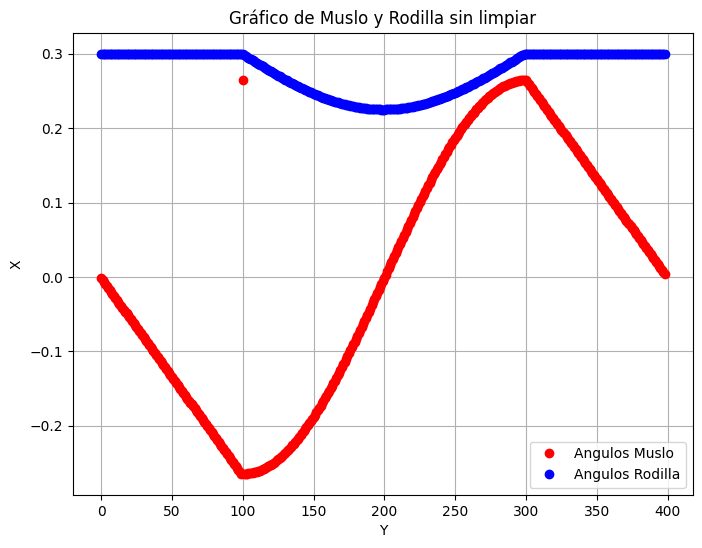

In [71]:
import matplotlib.pyplot as plt
# Extraer las columnas
x_values = prediccion[:, 0] # Muslo
y_values = prediccion[:, 1] # Rodilla

# Para restarle los 90° que molestan, de dajr bien
x_values -= 1.5


# Mostrar el gráfico
plt.show()
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(mov_x, 'ro', label='Angulos Muslo')  # Grupo 1 en rojo ('ro')
plt.plot(mov_y, 'bo', label='Angulos Rodilla')  # Grupo 1 en rojo ('ro')
plt.xlabel('Y')  # Etiqueta eje X
plt.ylabel('X')  # Etiqueta eje Y
plt.title('Gráfico de Muslo y Rodilla sin limpiar')  # Título del gráfico
plt.legend()  # Mostrar leyenda
""" plt.gca().invert_xaxis()  # Invertir eje X
plt.gca().invert_yaxis()  # Invertir eje Y """
# Muestra el gráfico
plt.grid(True)  # Agregar cuadrícula
plt.show()

In [ ]:
prediccion

In [85]:
import sim
import numpy as np
import sympy as sp
import pandas as pd
import time
import threading as thr
import keyboard


def connect(port):
# Establece la conexión a CoppeliaSim
# port debe coincidir con el puerto de conexión en VREP
# retorna el número de cliente o -1 si no puede establecer conexión
    sim.simxFinish(-1) # just in case, close all opened connections
    clientID=sim.simxStart('127.0.0.1',port,True,True,2000,5) # Conectarse
    if clientID == 0: print("conectado a", port)
    else: print("no se pudo conectar")
    return clientID

# Conectarse al servidor de VREP
# *** ejecutar cada vez que se reinicia la simulación ***
clientID = connect(19999)

retCode,Dummy=sim.simxGetObjectHandle(clientID,'Dummy',sim.simx_opmode_blocking)
retCode,joint1=sim.simxGetObjectHandle(clientID,'joint1',sim.simx_opmode_blocking)
retCode,joint2=sim.simxGetObjectHandle(clientID,'joint2',sim.simx_opmode_blocking)

retCode,muslo1=sim.simxGetObjectHandle(clientID,'muslo1',sim.simx_opmode_blocking)
retCode,rodilla1=sim.simxGetObjectHandle(clientID,'rodilla1',sim.simx_opmode_blocking)

retCode,muslo2=sim.simxGetObjectHandle(clientID,'muslo2',sim.simx_opmode_blocking)
retCode,rodilla2=sim.simxGetObjectHandle(clientID,'rodilla2',sim.simx_opmode_blocking)

retCode,muslo3=sim.simxGetObjectHandle(clientID,'muslo3',sim.simx_opmode_blocking)
retCode,rodilla3=sim.simxGetObjectHandle(clientID,'rodilla3',sim.simx_opmode_blocking)

retCode,muslo4=sim.simxGetObjectHandle(clientID,'muslo4',sim.simx_opmode_blocking)
retCode,rodilla4=sim.simxGetObjectHandle(clientID,'rodilla4',sim.simx_opmode_blocking)


conectado a 19999


In [88]:
x_values = prediccion[:, 0]
y_values = prediccion[:, 1]
#x_values -= 1.5 

for i in range(len(x_values)):
    retCode = sim.simxSetJointTargetPosition(clientID, joint1, x_values[i], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, joint2, y_values[i], sim.simx_opmode_oneshot)
    time.sleep(0.001) #delay entre cada movimiento ejemplo: 0.001

In [51]:
# Crear un csv con la prediccion para revision manual
data = np.column_stack((prediccion[:, 0], prediccion[:, 1]))

# Crear un DataFrame de Pandas
df = pd.DataFrame(data, columns=['X', 'Y'])

# Guardar el DataFrame en un archivo CSV
df.to_csv('analisis_entrenado.csv', index=False)

In [12]:
x_values[0]

0.79516983

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


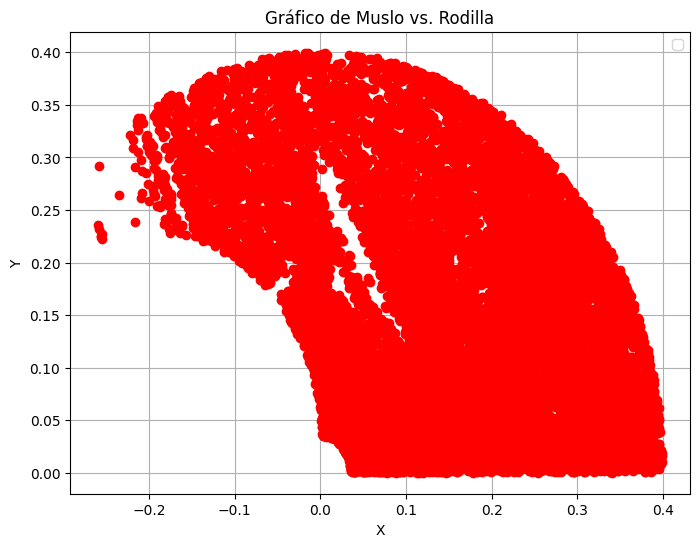

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Cargar el dataset
dataset = pd.read_csv('datos_entrenamiento.csv')  # Asegúrate de reemplazar 'tu_dataset.csv' con el nombre de tu archivo


# Crea el gráfico con dos colores diferentes
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(dataset['PosY'], dataset['PosX'], 'ro')  # Grupo 1 en rojo ('ro')
plt.xlabel('X')  # Etiqueta eje X
plt.ylabel('Y')  # Etiqueta eje Y
plt.title('Gráfico de Muslo vs. Rodilla')  # Título del gráfico
plt.legend()  # Mostrar leyenda

# Muestra el gráfico
plt.grid(True)  # Agregar cuadrícula
plt.show()